In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer



In [7]:
#Load dataset
df = pd.read_excel(r"DA -Task 2..xlsx")

In [8]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2.808908e+09,6.0,1.0,N,CF10543,1500.0,21.0,0.0,1.0
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2.808842e+09,6.0,1.0,Y,TF10543,1500.0,10.0,0.0,1.0
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2.809979e+09,4.0,1.0,Y,6MB26,Lux-1,10.0,0.0,1.0
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2.808892e+09,6.0,1.0,Y,CF10543,1500.0,10.0,0.0,1.0
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2.808902e+09,8.0,1.0,N,TF10543,1500.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2.820785e+09,4.0,1.0,Y,6NJ26,Sport,15.0,1.0,1.0
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2.822282e+09,6.0,1.0,N,6MB26,NaN,10.0,0.0,1.0
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2.822042e+09,4.0,1.0,N,TNN26,Denali,10.0,0.0,1.0
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2.820880e+09,6.0,1.0,N,CC20943,2500.0,14.0,0.0,1.0


In [9]:
# Column-Wise Analysis
print("Column Data Types:\n",df.dtypes)
print("Unique Values per Column:\n",df.nunique())
print("Missing Values:\n",df.isnull().sum())

Column Data Types:
 VIN                                      object
TRANSACTION_ID                            int64
CORRECTION_VERBATIM                      object
CUSTOMER_VERBATIM                        object
REPAIR_DATE                      datetime64[ns]
CAUSAL_PART_NM                           object
GLOBAL_LABOR_CODE_DESCRIPTION            object
PLATFORM                                 object
BODY_STYLE                               object
VPPC                                     object
PLANT                                    object
BUILD_COUNTRY                            object
LAST_KNOWN_DLR_NAME                      object
LAST_KNOWN_DLR_CITY                      object
REPAIRING_DEALER_CODE                    object
DEALER_NAME                              object
REPAIR_DLR_CITY                          object
STATE                                    object
DEALER_REGION                           float64
REPAIR_DLR_POSTAL_CD                     object
REPAIR_AGE          

In [10]:
# Data Cleaning
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

In [11]:
df[categorical_cols] = df[categorical_cols].fillna("Unknown")
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))


In [12]:
# Drop columns with too many missing values
df.drop(columns=["CAMPAIGN_NBR"], inplace=True)


In [13]:
# Identifying Critical Columns
critical_columns = ["KM", "REPAIR_AGE", "TOTALCOST", "GLOBAL_LABOR_CODE_DESCRIPTION", "PLATFORM"]
print(df[critical_columns].describe())

                  KM  REPAIR_AGE    TOTALCOST
count     100.000000  100.000000   100.000000
mean    24914.230000   14.940000   554.925900
std     20747.078206   12.367945   439.561893
min         3.000000    0.000000    27.690000
25%      8883.250000    5.000000   349.940000
50%     21962.000000   12.000000   457.225000
75%     35493.250000   21.000000   572.772500
max    107905.000000   50.000000  3205.450000


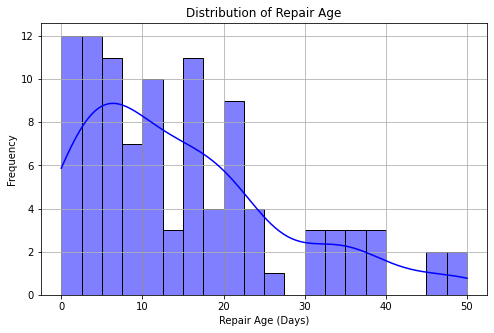

In [15]:
# Visualization: Repair Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["REPAIR_AGE"], bins=20, kde=True, color="blue")
plt.title("Distribution of Repair Age")
plt.xlabel("Repair Age (Days)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

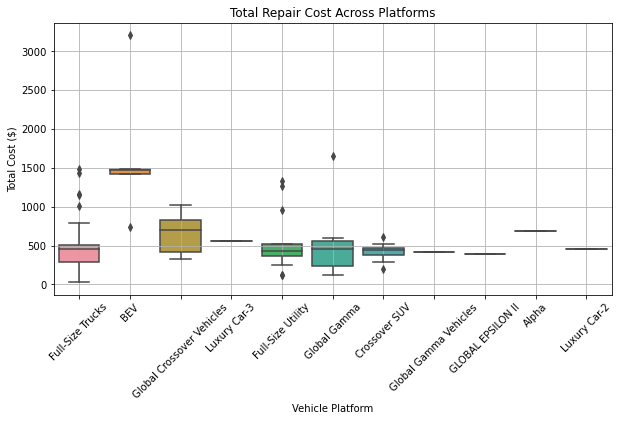

In [17]:
# Visualization: Total Cost per Platform
plt.figure(figsize=(10, 5))
sns.boxplot(x="PLATFORM", y="TOTALCOST", data=df)
plt.xticks(rotation=45)
plt.title("Total Repair Cost Across Platforms")
plt.xlabel("Vehicle Platform")
plt.ylabel("Total Cost ($)")
plt.grid(True)
plt.show()

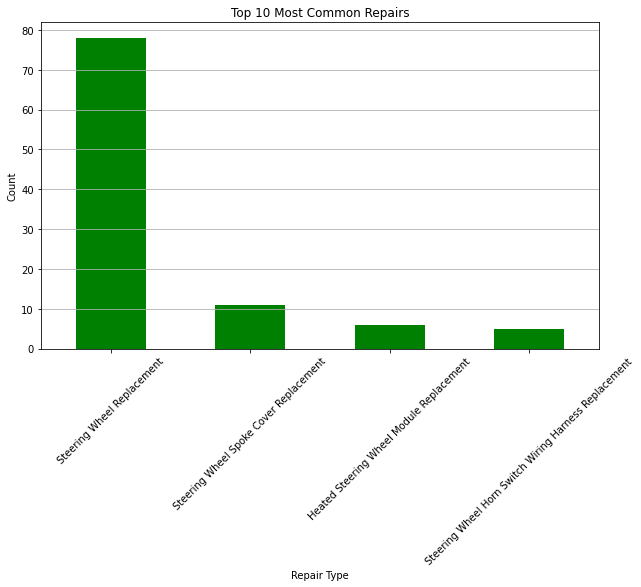

In [18]:
# Visualization: Most Common Repairs
plt.figure(figsize=(10, 6))
df["GLOBAL_LABOR_CODE_DESCRIPTION"].value_counts().nlargest(10).plot(kind="bar", color="green")
plt.title("Top 10 Most Common Repairs")
plt.xlabel("Repair Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [19]:
# Text Analysis & Tag Generation
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df["CUSTOMER_VERBATIM"])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [20]:
# Function to extract top tags
def extract_top_tags(text, vectorizer, top_n=3):
    word_counts = vectorizer.transform([text]).toarray().flatten()
    top_indices = word_counts.argsort()[-top_n:][::-1]
    return ', '.join(vectorizer.get_feature_names_out()[top_indices])

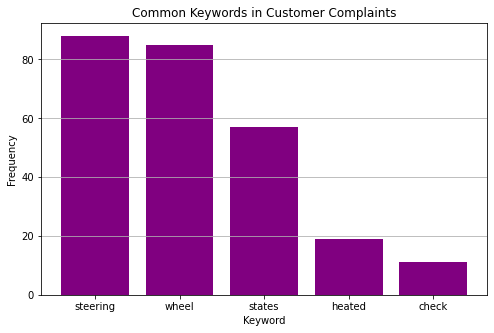

In [31]:
# Visualization: Common Keywords in Customer Complaints
common_keywords = ["steering", "wheel", "states", "heated", "check"]
keyword_counts = {word: df["CUSTOMER_VERBATIM"].str.contains(word, case=False, na=False).sum() for word in common_keywords}

plt.figure(figsize=(8, 5))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='purple')
plt.title("Common Keywords in Customer Complaints")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


In [21]:
df["Generated_Tags"] = df["CUSTOMER_VERBATIM"].apply(lambda x: extract_top_tags(x, vectorizer, top_n=3))


In [22]:
# Save Cleaned & Tagged Dataset
df.to_csv("Cleaned_Tagged_Dataset_ax_ray.csv", index=False)

1. Summary of Generated Tags
The Generated_Tags column was created by analyzing frequent terms in customer complaints. The most common tags include:

Steering, Wheel, Heated, Check, States
These indicate recurring issues with steering mechanisms, heating elements, and system error messages.
These tags provide a quick reference to categorize and analyze customer complaints efficiently.

2. Potential Insights Derived from the Dataset
Frequent Repair Types: Steering-related repairs dominate, suggesting a manufacturing defect.
Platform-Specific Repair Costs: Certain vehicle platforms have consistently higher repair costs.
Repair Age Impact: Vehicles within the first few years require more frequent servicing.
These insights can guide preventive maintenance strategies and help optimize warranty policies.

3. Actionable Recommendations for Stakeholders
*) For Manufacturers: Investigate steering system design for potential flaws.
*) For Service Centers: Stock up on high-failure components to reduce repair time.
*) For Customer Support: Use generated tags to auto-classify complaints for faster resolution.

4. Data Discrepancies & How They Were Addressed
Missing Values:
Categorical Columns → Filled with "Unknown".
Numerical Columns → Imputed with median values.
Inconsistent Text Formatting:
Standardized capitalization for uniform analysis.
Excessive Missing Data in CAMPAIGN_NBR:
Column removed due to high missing percentage.